# Mice vs Humans: Dendritic Morphology, Fast-Spiking Electrophysiology, and GAD Genes

## Team Member Names

- **Kaushika Uppu**
- **Emily Obedoza**

# Abstract

Our analysis explores the differences in dendritic morphology (spiny, aspiny, sparsely spiny) between mice and humans and fast-spiking electrophysiology characteristics through expression of genes GAD1 and GAD2. Morphological and electrophysiological data was obtained from the Allen Brain Atlas Cell Types database to compare dendritic type between mice and humans and fast-spiking electrophysiology features between cell types. RNA-Seq data was also obtained from the Allen Brain Map database to relate gene expression to these characteristics. Results indicated that there were greater levels of aspiny neurons in mice compared to humans, significantly greater expression of GAD genes in mice than humans, and significantly steeper F/I curves in aspiny neurons compared to spiny neurons. 

# Research Question

How does the dendritic morphology of human and mouse neurons compare and how do fast-spiking electrophysiology characteristics compare between dendritic cell types, and to what extent can it be attributed to the expression levels of genes GAD1 and GAD2?

# Background and Prior Work

Gamma-aminobutyric acid (GABA) is commonly known as the main inhibitory neurotransmitter for modulating neuronal activity in the brain and spinal cord. Its method of action lies in binding to postsynaptic GABA receptors that hyperpolarize the cell to prevent further synaptic transmission (Jewett and Sharma, 2023). There are several classifications for the dendritic type of neurons: spiny, aspiny, and sparsely spiny. Most fast-spiking (FS) interneurons are aspiny, which have a smooth morphotype and secrete GABA. The low expression levels of GluR2 (glutamate receptors) increases the permeability of calcium into these cells, which results in increased kinetics (Goldberg et al., 2003). Interestingly, metadata from the Allen Brain Atlas Cell Types Database showcases that mice have greater levels of aspiny neurons than humans. Due to these increased levels in mice, we are motivated to study whether or not there is also increased expression of GAD1 and GAD2—the genes that catalyze the production of GABA from glutamate. Furthermore, we aim to explore and compare the electrophysiology features of mouse and human neurons to determine if aspiny cells showcase increased FS characteristics, such as upstroke/downstroke ratios and F/I curve slopes. 

Previous research has explored the electrophysiology and spatial characteristics of GABAergic neurons and separated them into classes, such as fast-spiking, low threshold-spiking, and having axons in close proximity with other dendrites (Kawaguchi et at., 1997). There has also been research exploring the mechanisms behind some of these electrophysiology features, which cause fast-spiking (Goldberg et al., 2003). These studies motivate our research on exploring fast-spiking characteristics of aspiny cells; however, there haven't been many studies specifically pertaining to the comparison of GAD genes to mice and humans. One study that mentions GAD genes explores its expression in P19 embryonal carcinoma cells; however, this research was performed in vitro and does not specifically compare mouse and human cells.

To complete our project, our first dataset utilized cell metadata and electrophysiology data from the Allen Brain Atlas Cell Types database. This database contains information about individual cell electrophysiology and morphology, specifically in the cerebral cortex and thalamus of both mice and humans. This dataset was used for the purpose of obtaining the dendritic morphology and electrophysiology features of mouse and human neurons. Our second and third datasets were also derived from the Allen Brain Cell Types database. Instead of morphological and electrophysiological data, it consisted of RNA-Seq data from the whole cortex and hippocampus of mice, and multiple cortical areas of humans. We used these datasets to specifically isolate median GAD1 and GAD2 expression for further analysis.


## References (include links):
(1) Bain, G., Ramkumar, T. P., Cheng, J. M., & Gottlieb, D. I. (1993). Expression of the genes coding for glutamic acid decarboxylase in pluripotent cell lines. Brain research. Molecular brain research, 17(1-2), 23–30. https://doi.org/10.1016/0169-328x(93)90068-z

(2) Goldberg, J. H., Tamas, G., Aronov, D., & Yuste, R. (2003). Calcium Microdomains in Aspiny Dendrites. Neuron, 40(4), 807–821. https://doi.org/10.1016/S0896-6273(03)00714-1

(3) Jewett, B. E., & Sharma, S. (2021). Physiology, GABA. PubMed; StatPearls Publishing. https://pubmed.ncbi.nlm.nih.gov/30020683/ 

(4) Kawaguchi, Y., Aosaki, T., & Kubota, Y. (1997). Cholinergic and GABAergic interneurons in the striatum. Nihon Shinkei Seishin Yakurigaku Zasshi = Japanese Journal of Psychopharmacology, 17(2), 87–90. https://pubmed.ncbi.nlm.nih.gov/9201728/ 

# Hypothesis

Since the mechanisms of modulating neuronal activity are similar across species, we believe that the electrophysiology features across cell types will also be similar. However the fast-spiking (FS) characteristics should be greater in aspiny cells due to the fact that most FS interneurons are aspiny and secrete GABA. Thus, we hypothesize that aspiny cells will demonstrate a higher upstroke/downstroke ratio and steeper F/I curve slope. Additionally, we believe that the sheer number of aspiny cells should affect gene expression. As a result, we hypothesize that if mice have a greater cell count of aspiny neurons than humans, then they will also exhibit greater GAD1 and GAD2 expression. 

# Setup

We first imported three packages that will be used throughout the project: `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`. We also imported a statistics package—`scipy.stats`—that will be used during data analysis.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Wrangling

## Electrophysiology Features of Mice and Human Cells

Our first dataset is from the Allen Cell Types database. This dataset is comprised of different cells, as well as information on those cells such as the brain cortical layer, dendrite type, and normalized depth. Since we are interested in comparing mouse and human cells, we split this data up into `mouse_cells` and `human_cells` by indexing by species using the CellTypesCache. We also set the index for both datasets to be `id` so that they can be merged with the electrophysiology data later on.

In [2]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

mouse_cells = pd.DataFrame(ctc.get_cells(species=['Mus musculus'])).set_index('id')
human_cells = pd.DataFrame(ctc.get_cells(species=['Homo Sapiens'])).set_index('id')

Some of the columns in this dataset are not needed for this project (for example, the `species` column is redundant after splitting the data by species), so we subsetted the dataframe to only contain columns with information that are relevant.

In [3]:
mouse_cells = mouse_cells.drop(columns=['reporter_status', 'cell_soma_location', 'species', 'disease_state', 'reconstruction_type', 'donor_id'])
human_cells = human_cells.drop(columns=['reporter_status', 'cell_soma_location', 'species', 'disease_state', 'reconstruction_type', 'donor_id'])

A look at the `mouse_cells` data:

In [4]:
mouse_cells.head(5)

,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,structure_hemisphere,normalized_depth
id,,,,,,,,,
565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,left,0.582057
469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,right,0.469578
605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,right,NaN
485909730,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,right,0.478344
323865917,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,left,0.608590


A look at the `human_cells` data:

In [5]:
human_cells.head(5)

,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,structure_hemisphere,normalized_depth
id,,,,,,,,,
525011903,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,right,NaN
528642047,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,left,NaN
537256313,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,right,NaN
519832676,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,left,0.290951
596020931,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,left,0.497825


We then needed to get the electrophysiology data for the cells. We set the index to be `specimen_id`, which is similar to `id` from the metadata, making it easier to merge the two. As seen below, this dataset contains various electrophysiology features for the different cells.

In [6]:
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
ephys_features.head(5)

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


We then joined the ephys data with the metadata, separated by species. This allowed us to create two new dataframes, `mouse_df` and `human_df`, that contain all of the electrophysiology properties for these cells.

In [7]:
mouse_df = mouse_cells.join(ephys_features)
human_df = human_cells.join(ephys_features)

A glimpse of `mouse_df`:

In [8]:
mouse_df.head(5)

,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,structure_hemisphere,normalized_depth,adaptation,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,left,0.582057,NaN,...,14.738000,1.391268,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987
469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,right,0.469578,0.000643,...,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,right,NaN,-0.015098,...,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036
485909730,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,right,0.478344,0.032340,...,2.888133,1.520193,-54.031254,-57.385419,-77.750005,3.042933,3.517684,3.274181,-101.000000,-76.928391
323865917,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,left,0.608590,0.026732,...,3.467847,1.317042,-57.281254,-56.895833,-70.218751,2.974194,3.156117,2.946463,-88.406250,-69.402855


A glimpse of `human_df`:

In [9]:
human_df.head(5)

,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,structure_hemisphere,normalized_depth,adaptation,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
525011903,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,right,NaN,0.027846,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
528642047,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,left,NaN,0.001610,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
537256313,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,right,NaN,0.054784,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,left,0.290951,0.179194,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
596020931,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,left,0.497825,0.196552,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269


## Gene Expression in Mice and Humans

As we aim to compare gene expression between mice and humans, we then needed to get gene expression data for both species. Both datasets are from the Allen Brain Map RNA-Seq Data. For the mice gene expression data, we used the `Mouse Whole Cortex and Hippocampus 10x` dataset, while for the human gene expression data, we used the `Human Mulitple Cortical Areas SMART-seq` data. For both species, we used the `medians` files, which contain median expression by cell type.

In [10]:
mouse_genes = pd.read_csv('mouse_genes.csv').set_index('feature')
mouse_genes.head(5)

,108_Pvalb,229_L6 IT CTX,26_Ntng1 HPF,67_Sst,6_Lamp5 Lhx6,111_Pvalb,359_CA2-IG-FC,238_Car3,347_CA1-do,219_L6 IT CTX,...,50_Vip,190_L4/5 IT CTX,207_L5/6 IT CTX,342_CA1,260_L5 PT CTX,324_ProS,178_L4 IT CTX,284_L6 CT CTX,377_Astro,298_L6 CT ENT
feature,,,,,,,,,,,,,,,,,,,,,
Xkr4,9.92,9.08,9.21,10.27,9.68,10.03,8.515,8.14,8.92,9.16,...,9.35,8.86,8.96,9.8,7.41,7.83,8.22,8.9,0.0,9.09
Gm1992,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
Gm37381,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
Rp1,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00
Sox17,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00


In [11]:
human_genes = pd.read_csv('human_genes.csv').set_index('feature')
human_genes.head(5)

,Exc L5-6 FEZF2 ANKRD20A1,Exc L5-6 THEMIS TMEM233,Inh L1 LAMP5 NDNF,Exc L6 FEZF2 CPZ,Astro L1 FGFR3 MT1G,Exc L2-3 LINC00507 RPL9P17,Exc L6 FEZF2 KRT17,Exc L3-4 RORB FOLH1B,Endo L2-5 CLDN5,Exc L5-6 RORB LINC00320,...,Exc L4 RORB CACNG5,Exc L6 FEZF2 FAM95C,Inh L1-3 VIP GGH,Exc L3-5 FEZF2 DCN,Exc L6 FEZF2 ETV4,Exc L5-6 FEZF2 RSAD2,Inh L1 ADARB2 DISP2,Inh L5-6 LAMP5 SFTA3,Exc L6 FEZF2 TBC1D26,Inh L4-5 PVALB TRIM67
feature,,,,,,,,,,,,,,,,,,,,,
3.8-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.8-1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.8-1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.8-1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5-HT3C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we want to look specifically at genes affecting GABA production, we then filtered both datasets for genes `GAD1` or `GAD2`, which previous research shows is involved in catalyzing the production of GABA from glutamate. We  then proceeded to get rid of any columns (cell types) that had zeros for both genes.

In [12]:
# Finding GAD1 and GAD2 genes in the mice data
gad_mice = []
for i in mouse_genes.index:
    if i == 'Gad1' or i == 'Gad2':
        gad_mice.append(i)

# Filtering original gene expression dataset for only GAD genes
mouse_gad_genes = mouse_genes.loc[gad_mice]

# Dropping columns that had all zeros
mouse_gad_genes = mouse_gad_genes.loc[:, (mouse_gad_genes != 0).any(axis=0)]

mouse_gad_genes

,108_Pvalb,26_Ntng1 HPF,67_Sst,6_Lamp5 Lhx6,111_Pvalb,30_Ntng1 HPF,102_Sst HPF,117_Pvalb,123_Pvalb Vipr2,66_Sst,...,48_Vip,92_Sst,112_Pvalb,53_Vip,90_Sst,81_Sst,39_Sncg,99_Sst,72_Sst,50_Vip
feature,,,,,,,,,,,,,,,,,,,,,
Gad2,10.545,10.26,9.58,11.39,9.94,9.41,9.38,9.49,8.71,9.03,...,8.525,10.150,9.40,9.005,10.36,10.00,10.19,9.70,9.79,8.21
Gad1,9.615,10.85,8.32,11.07,9.89,9.59,10.59,10.30,10.07,8.88,...,9.415,8.145,10.45,9.070,8.12,8.26,9.39,8.84,8.33,9.09


In [13]:
# Finding GAD1 and GAD2 genes in the human data
gad_human = []
for i in human_genes.index:
    if i == 'GAD1' or i == 'GAD2':
        gad_human.append(i)

# Filtering original gene expression dataset for only GAD genes
human_gad_genes = human_genes.loc[gad_human]

# Dropping columns that had all zeros
human_gad_genes = human_gad_genes.loc[:, (human_gad_genes != 0).any(axis=0)]

human_gad_genes

,Inh L1 LAMP5 NDNF,Inh L3-6 PVALB MFI2,Inh L1-4 VIP CHRNA2,Inh L1-6 PVALB SCUBE3,Inh L5-6 PVALB STON2,Inh L4-6 SST MTHFD2P6,Inh L1-3 VIP SSTR1,Inh L3-6 VIP KCTD13,Inh L5-6 SST KLHL14,Unnamed: 26,...,Inh L1 VIP PRSS8,Inh L1-3 VIP CCDC184,Inh L1-3 PAX6 NABP1,Inh L1-5 VIP KCNJ2,Inh L2-4 VIP LGI2,Inh L1-4 LAMP5 DUSP4,Inh L1-3 VIP GGH,Inh L1 ADARB2 DISP2,Inh L5-6 LAMP5 SFTA3,Inh L4-5 PVALB TRIM67
feature,,,,,,,,,,,,,,,,,,,,,
GAD1,9.70,8.12,9.54,8.03,9.47,9.45,8.725,9.39,8.11,6.96,...,8.755,9.32,9.225,9.49,9.17,9.56,8.88,8.73,8.94,9.78
GAD2,9.62,0.00,5.86,0.00,8.13,7.70,7.810,5.84,7.66,1.18,...,7.255,5.48,5.800,6.93,6.40,9.36,4.37,7.14,9.61,8.36


## Summary

We have loaded in datasets for electrophyiology properties and gene expressions for both human and mice. We filtered out the gene expression datasets to only contain the genes that we are interested in for this project: `GAD1` and `GAD2` genes.

# Data Analysis & Results

## Data Visualization

Since we want to compare dendritic morphology between mice and humans, we first aim to demonstrate the disparity between the levels of dendritic type (spiny, aspiny, sparsely spiny). Bar plots of dendritic type and cell count are plotted below.

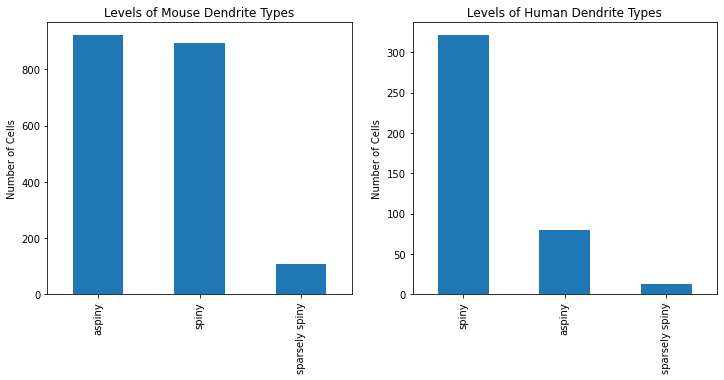

In [103]:
# Storing the counts of each dentritic type in variables for mouse and human
mouse_dendrite_type = mouse_df['dendrite_type'].value_counts()
human_dendrite_type = human_df['dendrite_type'].value_counts()

# Creating two subplots to compare mice and humans
fig,ax = plt.subplots(1,2,figsize=(12,5))

mouse_dendrite_type.plot(kind='bar', ax=ax[0])
ax[0].set_title('Levels of Mouse Dendrite Types')
ax[0].set_ylabel('Number of Cells')

human_dendrite_type.plot(kind='bar', ax=ax[1])
ax[1].set_title('Levels of Human Dendrite Types')
ax[1].set_ylabel('Number of Cells')



plt.show()

Both of the bar plots demonstrate the dendritic type on the x-axis (spiny, aspiny, sparsely spiny) and number of cells on the y-axis for both mice and humans. The bar plot on the left illustrates that humans have larger levels of spiny neurons than the rest of their dendritic types. Alternatively, the bar plot on the right shows that mice have higher levels of aspiny neurons than the rest of their dendritic types. The levels of sparsely spiny neurons are miniscule in both cases, and are therefore excluded from all further data analysis.

Since we ultimately want to relate the expression of GABAergic producing genes to levels of aspiny neurons, we first want to get a closer look at one dendritic cell type involved with the secretion of the neurotransmitter GABA. If we take a look specfically at the levels of aspiny cells between mice and humans there is a large disparity that we want emphasize. Below we have printed the specific cell counts of aspiny cells between mice and humans. Additionally, we have plotted this disparity onto a bar graph below.

In [15]:
# Specifically subsetting the count of aspiny neurons
mouse_aspiny_count = mouse_dendrite_type['aspiny']
human_aspiny_count = human_dendrite_type['aspiny']

print(f"The count of aspiny mouse neurons is: {mouse_aspiny_count}")
print(f"The count of aspiny human neurons is: {human_aspiny_count}")

The count of aspiny mouse neurons is: 921
The count of aspiny human neurons is: 79


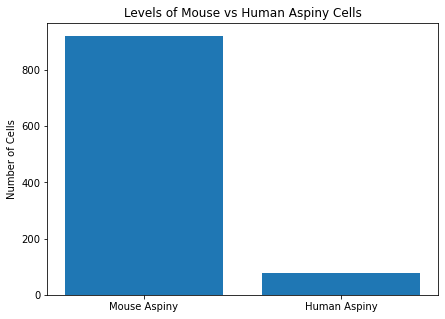

In [16]:
# Storing the values of mouse and human aspiny count in a dictonary
aspiny_data = {'Mouse Aspiny':mouse_aspiny_count, 'Human Aspiny':human_aspiny_count}

# Storing keys and values in a list separately
aspiny_hm = list(aspiny_data.keys())
aspiny_values = list(aspiny_data.values())

# Plotting aspiny cells of mice and humans
fig = plt.figure(figsize = (7, 5))
plt.bar(aspiny_hm, aspiny_values)

plt.title('Levels of Mouse vs Human Aspiny Cells')
plt.ylabel('Number of Cells')
plt.show()

The bar graph above specifically compares one cell type between mice and humans—the levels of aspiny neurons. This graph clearly illustrates the disparity between the two, and that the levels of aspiny mouse neurons is much greater than human aspiny neurons. 

Because of their ability to fire at high frequencies without adaptation, GABAergic cells are known to have fast-spiking electrophysiology characteristics. As a result, we want to examine and compare several electrophysiology features in which greater values would indicate that these neurons are fast-spiking. These two features that we want to take a closer look into are the upstroke/downstroke ratio and the F/I curve slope of dendritic cell types between mice and humans. Below we have plotted a total of four bar plots which are separated by mouse and human and contain information about dendritic type and fast-spiking electrophysiology feature.

In [102]:
# Making a copy of the original mouse and human df for manipulation
copy_mouse_df = mouse_df.copy()
copy_human_df = human_df.copy()

# Subsetting the data specifically into dendrite type and F/I curve slope and Upstroke/Downstroke ratio for mice and humans
fi_curve_mouse_df = copy_mouse_df[['dendrite_type', 'f_i_curve_slope']]
ud_ratio_mouse_df = copy_mouse_df[['dendrite_type', 'upstroke_downstroke_ratio_long_square']]

fi_curve_human_df = copy_human_df[['dendrite_type', 'f_i_curve_slope']]
ud_ratio_human_df = copy_human_df[['dendrite_type', 'upstroke_downstroke_ratio_long_square']]

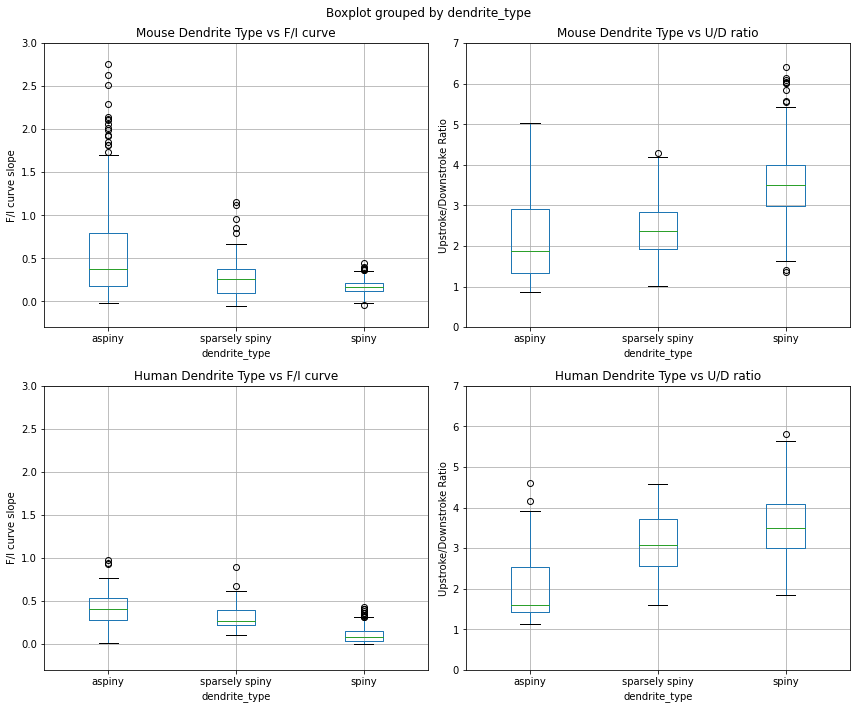

In [20]:
# Creating a 2x2 subplot, for a total of four plots
fig,ax = plt.subplots(2,2,figsize=(12,10))

fi_curve_mouse_df.boxplot(column='f_i_curve_slope', by='dendrite_type', ax=ax[0,0])
ax[0,0].set_title('Mouse Dendrite Type vs F/I curve')
ax[0,0].set_ylabel('F/I curve slope')
ax[0,0].set_ylim(-0.3, 3)

fi_curve_human_df.boxplot(column='f_i_curve_slope', by='dendrite_type', ax=ax[1,0])
ax[1,0].set_title('Human Dendrite Type vs F/I curve')
ax[1,0].set_ylabel('F/I curve slope')
ax[1,0].set_ylim(-0.3, 3)

ud_ratio_mouse_df.boxplot(column='upstroke_downstroke_ratio_long_square', by='dendrite_type', ax=ax[0,1])
ax[0,1].set_title('Mouse Dendrite Type vs U/D ratio')
ax[0,1].set_ylabel('Upstroke/Downstroke Ratio')
ax[0,1].set_ylim(0, 7)

ud_ratio_human_df.boxplot(column='upstroke_downstroke_ratio_long_square', by='dendrite_type', ax=ax[1,1])
ax[1,1].set_title('Human Dendrite Type vs U/D ratio')
ax[1,1].set_ylabel('Upstroke/Downstroke Ratio')
ax[1,1].set_ylim(0, 7)

plt.tight_layout()
plt.show()

All box plots illustrate the median, upper and lower quartiles, and outliers for each cell type pertaining to electrophysiology feature. The box plots on the left demonstrate the mouse and human electrophysiology feature of F/I curve slope. These illustrate that there might be larger F/I curve slopes in aspiny cell types across mice and humans. The box plots on the right demonstrate the electrophysiology feature of upstroke/downstroke ratio between mice and human dendritic cell types, but show that there might be a higher ratio in spiny, not aspiny, cells across cell types between mice and humans. 

Given several morphological and electrophysiological differences between dendritic cell type, we finally want to compare the levels of gene expression of GAD1 and GAD2—the genes that catalyze the production of GABA from glutamate. Below we have graphed two box plots which compare the median expression of these two genes across mice and humans.

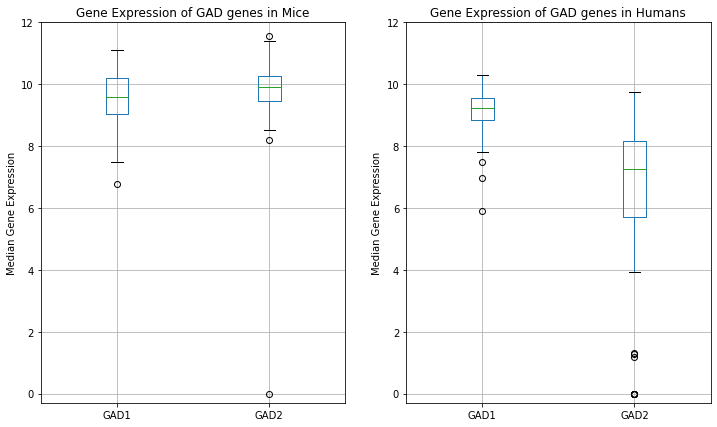

In [28]:
# Transposing the datasets
mouse_gad_genes_transposed = mouse_gad_genes.T
human_gad_genes_transposed = human_gad_genes.T

# Fixing order of columns for better visualization
mouse_gad_genes_transposed = mouse_gad_genes_transposed[['Gad1', 'Gad2']]

# Creating two subplots
fig,ax = plt.subplots(1,2,figsize=(12,7))

mouse_gad_genes_transposed.boxplot(ax=ax[0])
ax[0].set_title('Gene Expression of GAD genes in Mice')
ax[0].set_ylabel('Median Gene Expression')
ax[0].set_ylim(-0.3, 12)
ax[0].set_xticklabels(['GAD1', 'GAD2'])

human_gad_genes_transposed.boxplot(ax=ax[1])
ax[1].set_title('Gene Expression of GAD genes in Humans')
ax[1].set_ylabel('Median Gene Expression')
ax[1].set_ylim(-0.3, 12)

plt.show()

The box plot on the left illustrates GAD1 and GAD2 median expression in mice cells, and the box plot on the right illustrates the expression in human cells. The levels of GAD1 and GAD2 are relatively similar in mice cells; however, there may be a difference in expression between human cells. There also may be a difference in the expression of GAD2 between mice and humans.

Since we were able to discover several morphological, electrophysiological, and genetic disparities, we can now analyze whether or not these are significant differences by performing data analysis.

## Data Analysis

To understand whether the differences between the F/I curve and U/D ratio were significant between spiny and aspiny neurons, we ran two sample t-tests for both mice and humans. The siginficance level ($\alpha$) was set to 0.05.

In [97]:
# Creating lists for F/I curve and U/D ratio by dendrite type
mouse_aspiny_fi = fi_curve_mouse_df[fi_curve_mouse_df['dendrite_type'] == 'aspiny']['f_i_curve_slope']
mouse_spiny_fi = fi_curve_mouse_df[fi_curve_mouse_df['dendrite_type'] == 'spiny']['f_i_curve_slope']
mouse_aspiny_ud = ud_ratio_mouse_df[ud_ratio_mouse_df['dendrite_type'] == 'aspiny']['upstroke_downstroke_ratio_long_square']
mouse_spiny_ud = ud_ratio_mouse_df[ud_ratio_mouse_df['dendrite_type'] == 'spiny']['upstroke_downstroke_ratio_long_square']

human_aspiny_fi = fi_curve_human_df[fi_curve_human_df['dendrite_type'] == 'aspiny']['f_i_curve_slope']
human_spiny_fi = fi_curve_human_df[fi_curve_human_df['dendrite_type'] == 'spiny']['f_i_curve_slope']
human_aspiny_ud = ud_ratio_human_df[ud_ratio_human_df['dendrite_type'] == 'aspiny']['upstroke_downstroke_ratio_long_square']
human_spiny_ud = ud_ratio_human_df[ud_ratio_human_df['dendrite_type'] == 'spiny']['upstroke_downstroke_ratio_long_square']

# Running t-tests between dendrite type and by species
mouse_fi_stat, mouse_fi_pval = stats.ttest_ind(mouse_aspiny_fi, mouse_spiny_fi)
mouse_ud_stat, mouse_ud_pval = stats.ttest_ind(mouse_aspiny_ud, mouse_spiny_ud)

human_fi_stat, human_fi_pval = stats.ttest_ind(human_aspiny_fi, human_spiny_fi)
human_ud_stat, human_ud_pval = stats.ttest_ind(human_aspiny_ud, human_spiny_ud)

# Printing p-values for mouse and human electrophysiological properties
print('Mouse')
print('F/I Curve Difference between Aspiny and Spiny Neurons: ', mouse_fi_pval)
print('U/D Ratio Difference between Aspiny and Spiny Neurons: ', mouse_ud_pval)
print('Human')
print('F/I Curve Difference between Aspiny and Spiny Neurons: ', human_fi_pval)
print('U/D Ratio Difference between Aspiny and Spiny Neurons: ', human_ud_pval)

Mouse
F/I Curve Difference between Aspiny and Spiny Neurons:  1.8284951779932357e-101
U/D Ratio Difference between Aspiny and Spiny Neurons:  2.395710125684682e-205
Human
F/I Curve Difference between Aspiny and Spiny Neurons:  1.2138548166276756e-61
U/D Ratio Difference between Aspiny and Spiny Neurons:  8.07080060306004e-46


The p-values printed above are all less than the alpha level of 0.05, and therefore, we conclude that we can reject the null hypothesis that the groups test are likely from the same population. This means that all of the differences between dendrite type seen in the boxplots in the last section were significant, illustrating that there is a meaningful difference between the F/I curves and U/D ratios of aspiny versus spiny neurons.  

We then wanted to test whether the differences seen in the gene expression plots above truly reflect a significant disparity between mice and humans. To do so, we first checked if the distributions of gene expression were normal.

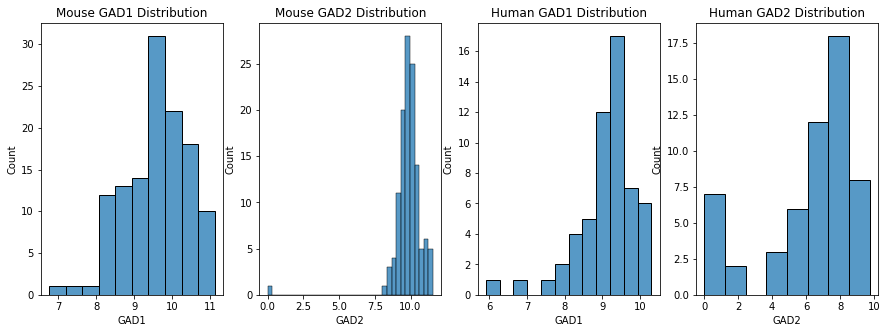

In [87]:
# Plotting distributions of GAD1 and gAD2 for mice and humans
fig, axs = plt.subplots(1, 4, figsize=(15,5))
sns.histplot(mouse_gad_genes_transposed['Gad1'], ax=axs[0]);
axs[0].set_title('Mouse GAD1 Distribution');
axs[0].set_xlabel('GAD1');
sns.histplot(mouse_gad_genes_transposed['Gad2'], ax=axs[1]);
axs[1].set_title('Mouse GAD2 Distribution');
axs[1].set_xlabel('GAD2');
sns.histplot(human_gad_genes_transposed['GAD1'], ax=axs[2]);
axs[2].set_title('Human GAD1 Distribution');
sns.histplot(human_gad_genes_transposed['GAD2'], ax=axs[3]);
axs[3].set_title('Human GAD2 Distribution');

As seen above, all of the median gene expression data is skewed and not normally distributed, and therefore we cannot use parametric tests to statistically test significance. Instead, we used the Mann-Whitney U Test (also called the Wilcoxon Rank Sum Test), which is a nonparametric test which determines whether two samples are likely to be from the same population. This is analagous to the two-sample t-test, however it does not require the assumption that data be normally distributed.

We conducted two tests: one for the median expression of GAD1 between mice and humans, and one for the median expression of GAD2, and used an alpha of 0.05 as the level of significance.

Reference: McClenaghan, E. (2022, July 6). Mann-Whitney U Test: Assumptions and Example. Informatics from Technology Networks. https://www.technologynetworks.com/informatics/articles/mann-whitney-u-test-assumptions-and-example-363425

In [88]:
# Creating lists of gene expression of both genes for each species
mouse_gad1 = list(mouse_gad_genes_transposed['Gad1'])
mouse_gad2 = list(mouse_gad_genes_transposed['Gad2'])
human_gad1 = list(human_gad_genes_transposed['GAD1'])
human_gad2 = list(human_gad_genes_transposed['GAD2'])

# Statistical test of median GAD1 expression between mice and humans
gad1_stat, gad1_pval = stats.mannwhitneyu(mouse_gad1, human_gad1)

# Statistical test of median GAD2 expression between mice and humans
gad2_stat, gad2_pval = stats.mannwhitneyu(mouse_gad2, human_gad2)

# Printing the p-values for both tests
print('GAD1 median expression p-value: ', gad1_pval)
print('GAD2 median expression p-value: ', gad2_pval)

GAD1 median expression p-value:  0.0005046998386343318
GAD2 median expression p-value:  1.4850380887510045e-23


The p-value for the GAD1 median expression difference is 0.0005, and the p-value for the GAD2 median expression difference is 1.485e-23. Both of these values are less than $\alpha$ = 0.05, and therefore these tests reveal that we reject the null hypothesis that these groups (mice GAD1/human GAD1 and mice GAD2/human GAD2) are likely to come from the same population. Therefore, the disparity in gene expression for GAD1 and GAD2 between mice and humans are significant.

The boxplot illustrating the gene expressions of GAD1 and GAD2 in mice and humans above shows that the median gene expressions are higher in mice than in humans, and combined with the Mann-Whitney U Test results, this data supports the conclusion that median GAD1 and GAD2 expression is greater in mice compared to their expression in humans.

# Conclusion & Discussion

Overall, the data reveals that there is a meaningful difference between the electrophysiological properties of Frequency/Current curve (F/I curve) and Upstroke/Downstroke ratio (U/D ratio) of aspiny versus spiny neurons. In both mice and humans, the F/I curve is significantly higher in aspiny neurons (p-value < 0.0001) while the U/D ratio is significantly higher in spiny neurons (p-value < 0.0001). We hypothesized that both of these electrophysiological properties will be greater in aspiny cells, and therefore our data supports our hypothesis for the F/I curve, but not the U/D ratio. These fast-spiking electrophysiological properties (specifically F/I curve) might be characteristic of GABAergic neurons (Kawaguchi et al., 1997), and since there is a large disparity between the number of aspiny neurons in mice and humans, this could potentially be related to GAD1 and GAD2 expression, which are involved in the creation of GABA.

Both GAD1 and GAD2 median expression were significantly different (p-value < 0.05) between mice and human cells. This result therefore confirms our hypothesis that a higher count of aspiny cells—as in mice—would translate to greater gene expression of GAD genes in GABA secreting neurons. Generally, this would also suggest that increased levels of a specific cell morphotype, such as a higher cell count, can be attributed to increased levels of gene expression. When combined with the results from the electrophysiological properties datasets, this demonstrates that there might be a correlation between the frequency/current curve of GABAergic aspiny neurons and GAD gene expression, as there was a higher F/I curve in aspiny neurons of mice, as well as greater GAD expression in mice compared to humans.

There are some limitations of this study. One possible limitation is that multiple various genes could play a role in dendrite type, and therefore solely looking at GAD1 and GAD2 might not reveal the full picture in terms of the differences in dendrite type between mice and humans. Another limitation is the relatively small datasets used in this analysis. For the gene expression datasets, after filtering for the GAD genes and filtering out columns with all zeros, there were less than 150 data points for each species. In further analysis, more data would need to be collected and examined to get a better understanding of the differences in gene expression between mice and humans. Finally, another limitation in this study is that the mice datasets were significantly larger than the human datasets, for both electrophysiological properties and median gene expression. Since there were far less human donors than mice donors, this led to imbalanced datasets, and could have resulted in results that don’t truly reflect the real differences between mice and humans. 

Future experiments in this realm that would be interesting would be to look at more genes (besides GAD1 and GAD2) that might play a role in dendrite type and therefore fast-spiking electrophysiological properties. In addition, since previous research has separated GABAergic neurons into distinct classes (Kawaguchi et al., 1997), we would also be curious to analyze electrophysiological properties of a different class, such as low threshold-spiking neurons, rather than fast-spiking neurons.